In [ ]:
DEBUG = True

In [3]:
import json

import numpy as np
from tqdm import tqdm

In [ ]:
M = np.random.randint(100, 1000)
K = np.random.randint(10, 100)

u = np.random.randint(0,2, size=M)
k = np.random.randint(0,2, size=K)

if (DEBUG): 
    print(M)
    print(K)
    print(u)
    print(k)

In [ ]:
def computeTag(u, k):
    dec_u = sum(int(digit) for digit in str(int("".join(map(str, u)), 2)))
    dec_k = sum(int(digit) for digit in str(int("".join(map(str, k)), 2)))

    if DEBUG:
        print("Computed k sum: ",dec_k)

    dec_tag = dec_u*dec_k
    tag = np.array([int(digit) for digit in bin(dec_tag)[2:]])
    return tag

In [ ]:
def verification (u, k, t):
    return np.array_equal(computeTag(u, k), t)


if(DEBUG):
    t = computeTag(u,k)
    print(t)
    #u = np.random.randint(0,2, size=M)
    print(verification(u,k,t))


***TASK 2***

In [ ]:
def computeAttackTag(u, dec_k):
    dec_u = sum(int(digit) for digit in str(int("".join(map(str, u)), 2)))
    dec_tag = dec_u*dec_k
    tagAttack = np.array([int(digit) for digit in bin(dec_tag)[2:]])
    return tagAttack 

In [ ]:
def sub_attack(u,t):
    dec_u = sum(int(digit) for digit in str(int("".join(map(str, u)), 2)))
    dec_tag = int("".join(map(str, t)), 2)
    dec_key = dec_tag//dec_u

    if DEBUG:
        print("Attacker computed k sum: ", dec_key)

    u1 = np.random.randint(0,2, size=M)
    tag1 = computeAttackTag(u1, dec_key)
    return u1, tag1

if (DEBUG):
    success = 0
    for i in tqdm(range(10000)):
        u = np.random.randint(0,2, size=M)
        k = np.random.randint(0,2, size=K)
        ogTag = computeTag(u, k)
        u1, tag1 = sub_attack(u, ogTag)
        if(verification(u1, k, tag1)):
            success += 1
    prob = success/10000
    print(prob)

***TASK 3***

In [ ]:
import math

#K = 10

def kSumProbability():
    dict = {}

    for k in range(int(math.pow(2, K))):
        
        if DEBUG and k % 10000 == 0:
            print('Iteration k = ', k)
        
        s = sum(int(digit) for digit in str(k))

        if dict.get(s) == None:
            dict[s] = 1
        else:
            dict[s] += 1

    #print(dict)
    print(max(dict, key=dict.get))

kSumProbability()


porca madonna roto vuole il grafico

In [5]:
import matplotlib.pyplot as plt

def plotHist(data):
    # Prepare data
    counts = data["digit_sum_counts"]
    x = list(range(len(counts)))
    y = counts

    # Find the index of the highest value
    max_index = y.index(max(y))

    # Set bar colors: default to one color, highlight max with another
    colors = ['skyblue'] * len(y)
    colors[max_index] = 'orange'  # Highlight the max bar

    # Plotting
    plt.figure(figsize=(14, 6))
    plt.bar(x, y, color=colors)
    plt.xlabel('Digit Sum')
    plt.ylabel('Count')
    plt.title('Digit Sum Counts')
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # Annotate the highest bar
    plt.text(
        max_index, y[max_index],
        f'{max_index:,}',
        ha='center', va='bottom',
        fontsize=10, fontweight='bold', color='orange'
    )

    plt.tight_layout()
    plt.show()


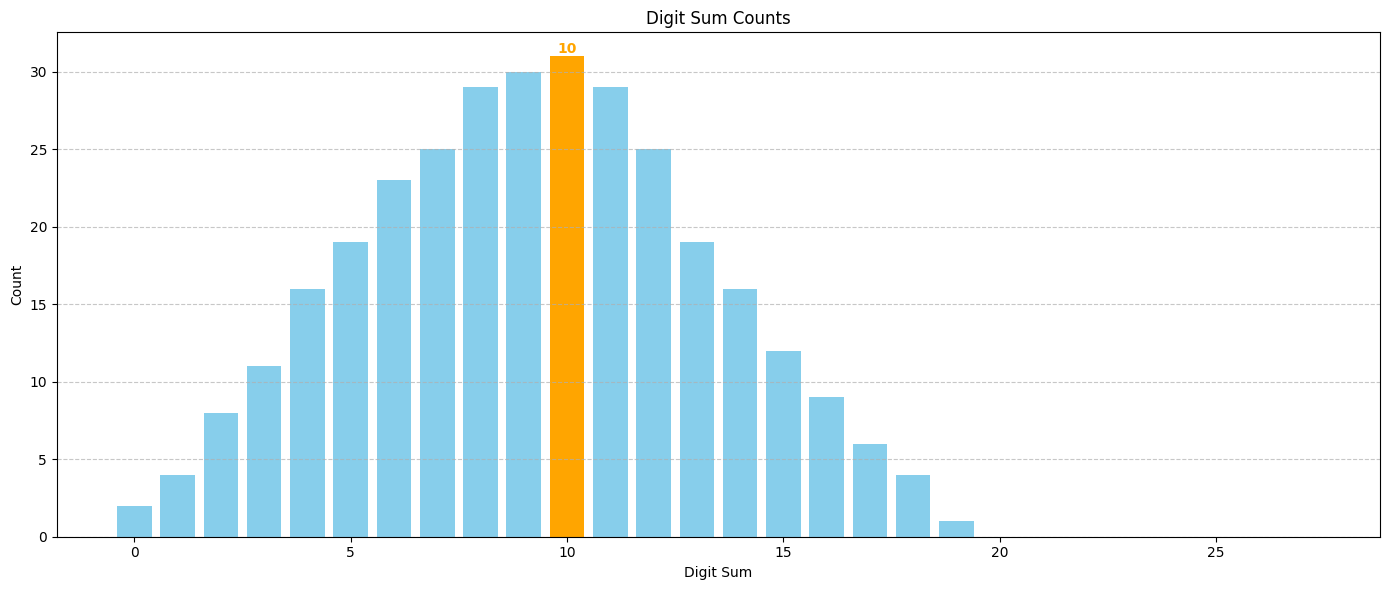

In [10]:
with open('digit_sum_counts_8.json', 'r') as f:
    data = json.load(f)
    plotHist(data)

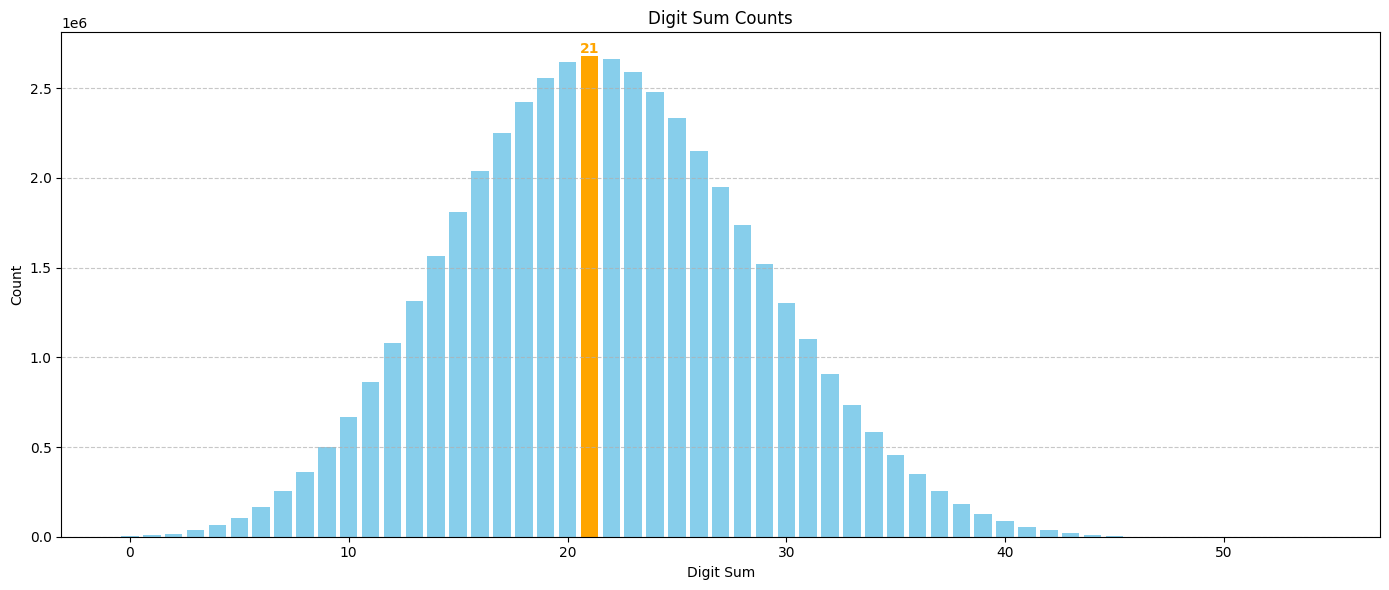

In [11]:
with open('digit_sum_counts_18.json', 'r') as f:
    data = json.load(f)
    plotHist(data)

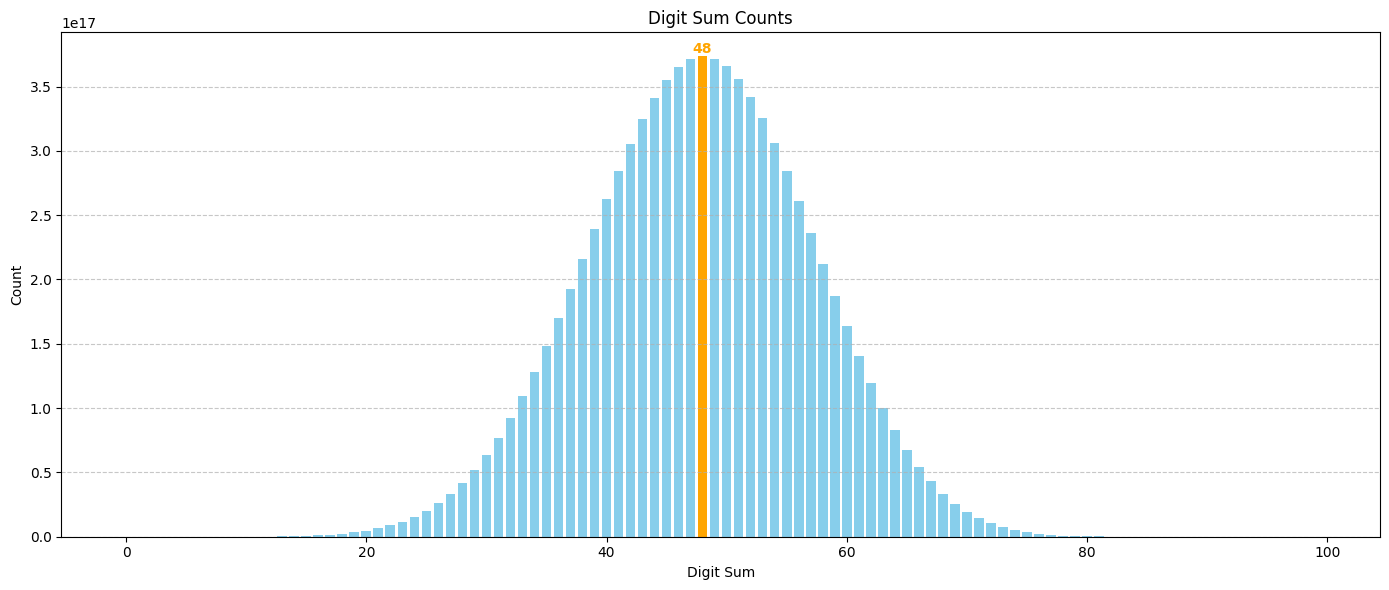

In [12]:
with open('digit_sum_counts_36.json', 'r') as f:
    data = json.load(f)
    plotHist(data)

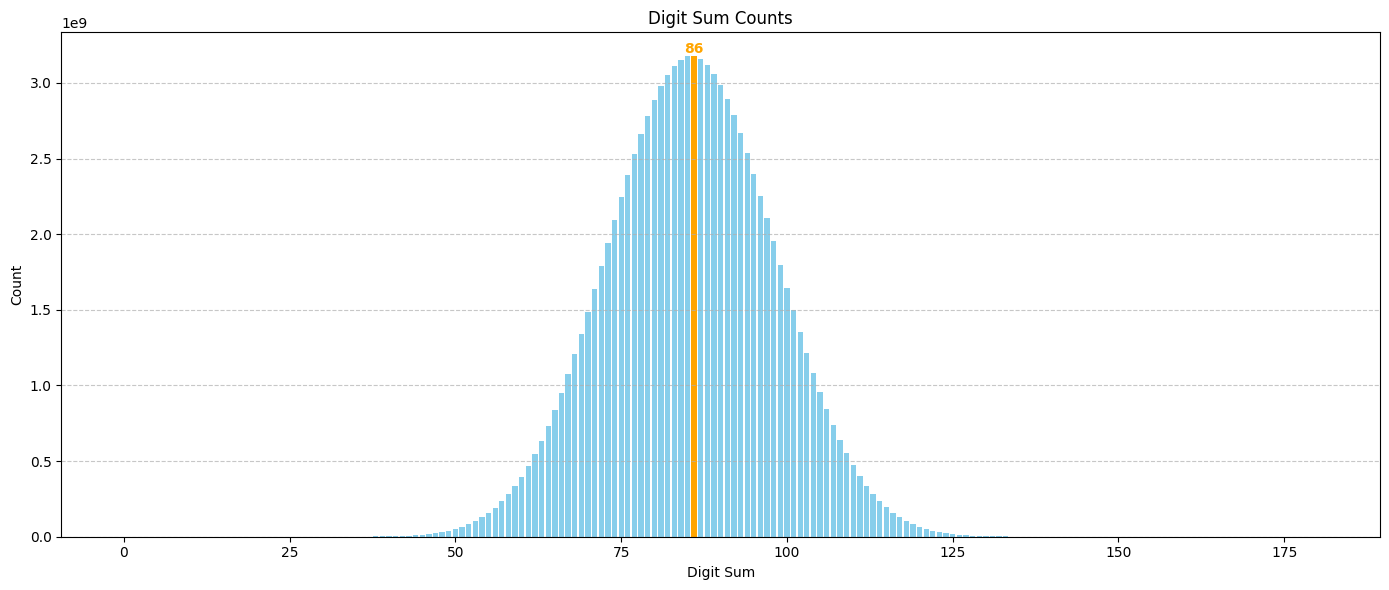

In [6]:
with open('digit_sum_sample_64.json', 'r') as f:
    data = json.load(f)
    plotHist(data)

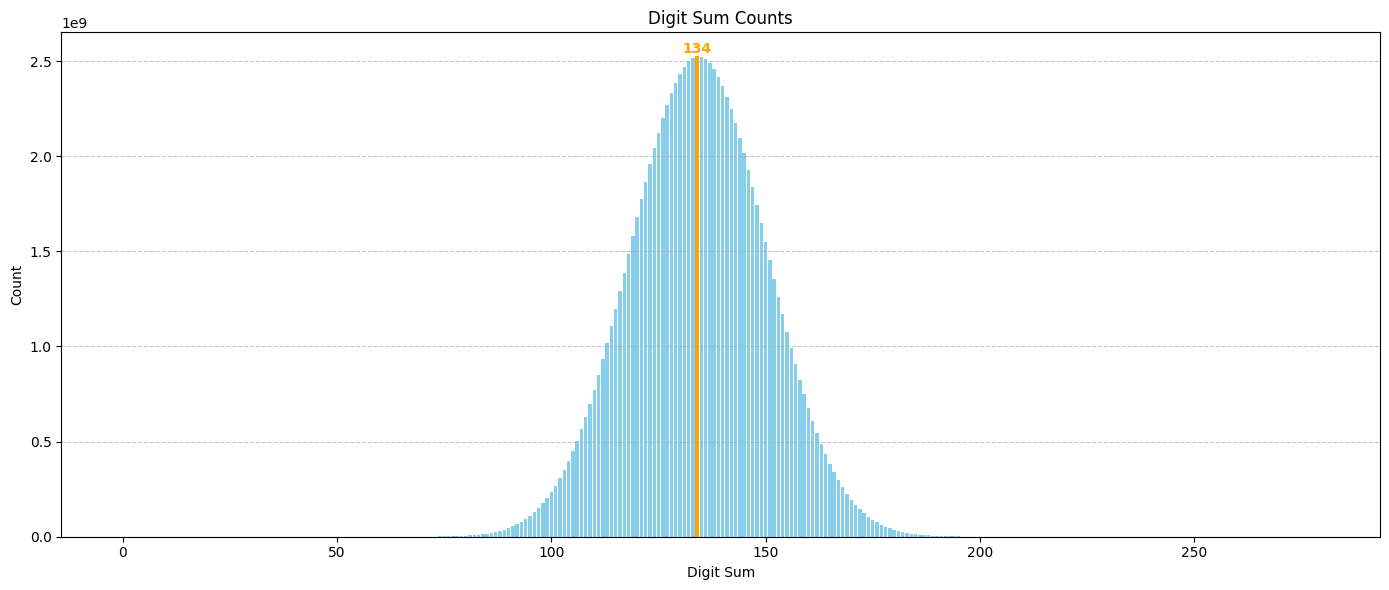

In [7]:
with open('digit_sum_sample_100.json', 'r') as f:
    data = json.load(f)
    plotHist(data)